## Linear Regression

In [47]:
def mean(x):
    return sum(x)/len(x)

In [48]:
def covariant(x,y):
    x_mean = mean(x)
    y_mean = mean(y)
    return sum([(x_i -x_mean)*(y_i - y_mean) for x_i, y_i in zip(x,y)])/len(x)

In [49]:
def standard_deviation(x):
    x_mean = mean(x)
    return (sum([(x_i -x_mean) ** 2 for x_i in x])/len(x))**0.5
    

In [50]:
def correlation(x,y):
    return covariant(x,y)/(standard_deviation(x)*standard_deviation(y))

In [51]:
def predict(alpha,beta,x):
    return beta * x + alpha

In [52]:
def error(alpha, beta, x, y):
    return y - predict(alpha,beta,x)

In [53]:
def sum_of_squared_error(alpha, beta, x, y):
    return sum([error(alpha, beta, x_i, y_i) ** 2
                for x_i, y_i in zip(x,y)])

## least squares solution 

In [54]:
def least_squares_fit(x, y):
    """given training values for x and y,
    find the least-squares values of alpha and beta"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

Reasoning for the above equation:

The choice of alpha simply says that when we see the average value of the independent variable x, we predict the average value of the dependent variable y.

The choice of beta means that when the input value increases by standard_deviation(x), the prediction increases by correlation(x, y) * standard_deviation(y)

In the case when x and y are perfectly correlated, a one standard deviation increase in x results in a one-standard-deviation-of-y increase in the prediction. When they’re perfectly anticorrelated, the increase in x results in a decrease in the prediction. And when the correlation is zero, beta is zero, which means that changes in x don’t affect the prediction at all.

In [59]:
def de_mean(y):
    y_mean = mean(y)
    return [y_i -y_mean for y_i in y]

In [56]:
def total_sum_of_squared(y):
    return sum([v ** 2 for v in de_mean(y)])

In [63]:
def r_squared(alpha,beta,x,y):
    """part that can be explained by model"""
    return 1 - sum_of_squared_error(alpha,beta,x,y)/total_sum_of_squared(y)

In [58]:
import random

In [67]:
x = list(range(1,100))
y = [i*2+random.randint(0,10)-5 for i in x]

In [68]:
alpha, beta = least_squares_fit(x, y)

In [69]:
print('alpha is {}, beta is {}'.format(alpha, beta))

alpha is -0.6378066378066194, beta is 2.0089177489177485


In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

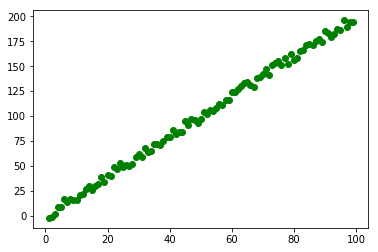

In [71]:
plt.scatter(x,y,color='green')
plt.show

In [72]:
r_squared(alpha, beta,x, y)

0.9971428746938986